In [ ]:
#Problem-1
# 1 Load the Dataset:
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/Concepts of AI/Datasets/diabetes.csv")

print("First 5 rows of the dataset \n",dataset.head())

print("\n Dataset Information:",dataset.info())

print("\n Missing values in each column:",dataset.isnull().sum())

print("\n Summary statistics for numerical columns:\n",dataset.describe())


First 5 rows of the dataset 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1  

In [ ]:
# 2 Handle Missing Data:
columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_missing_values:
    dataset[column].fillna(dataset[column].median(), inplace=True)
print("Zero values after handling:")
print((dataset[columns_with_missing_values] == 0).sum())

Zero values after handling:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


<ipython-input-9-a5332b1245ba>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(dataset[column].median(), inplace=True)


In [ ]:
import numpy as np
# 3 Feature Engineering:

# Separate the feature matrix (X) and target variable (y)
X = dataset.drop('Outcome', axis=1).values
y = dataset['Outcome'].values

# Shuffle and split the dataset into training and test sets
np.random.seed(0)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

split_index = int(0.7 * X.shape[0])

X_train = X[indices[:split_index]]
y_train = y[indices[:split_index]]
X_test = X[indices[split_index:]]
y_test = y[indices[split_index:]]

print("Training set shapes: X_train =", X_train.shape, ", y_train =", y_train.shape)
print("Test set shapes: X_test =", X_test.shape, ", y_test =", y_test.shape)


# 4 Implement KNN:
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict_single(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_indices]

        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X_test):
        predictions = [self.predict_single(x) for x in X_test]
        return np.array(predictions)

k = 3
knn = KNN(k=k)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = np.mean(predictions == y_test)
print(f"KNN  Accuracy: {accuracy:.2f}")


Training set shapes: X_train = (537, 8) , y_train = (537,)
Test set shapes: X_test = (231, 8) , y_test = (231,)
KNN  Accuracy: 0.70


In [ ]:
# Problem-2
# 1
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict_single(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X_test):
        predictions = [self.predict_single(x) for x in X_test]
        return np.array(predictions)

def standardize(X):
  return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Example Usage:
# Scale the features of matrix
X_train_scaled = standardize(X_train)
X_test_scaled = standardize(X_test)

# Use the scaled data for training and testing the kNN Classifier.
k = 3
knn = KNN(k=k)
knn.fit(X_train_scaled, y_train)

predictions = knn.predict(X_test_scaled)

#Record the results.
accuracy = np.mean(predictions == y_test)
print(f"KNN  Accuracy: {accuracy:.2f}")

KNN  Accuracy: 0.70


In [ ]:
# 2
# Step 1: Train and Test KNN on the Original (Unscaled) Dataset
knn_original = KNN(k=3)
knn_original.fit(X_train, y_train)
predictions_original = knn_original.predict(X_test)
accuracy_original = np.mean(predictions_original == y_test)

# Step 2: Train and Test KNN on the Scaled Dataset
X_train_scaled = standardize(X_train)
X_test_scaled = standardize(X_test)
knn_scaled = KNN(k=3)
knn_scaled.fit(X_train_scaled, y_train)
predictions_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = np.mean(predictions_scaled == y_test)

# Step 3: Print and Compare the Results
print(f"Accuracy on Original (Unscaled) Dataset: {accuracy_original:.2f}")
print(f"Accuracy on Scaled Dataset: {accuracy_scaled:.2f}")


Accuracy on Original (Unscaled) Dataset: 0.70
Accuracy on Scaled Dataset: 0.70


Similar Scales: If your features were already in similar ranges, scaling wouldn't impact performance much.
Irrelevant Features: If the data has noisy or irrelevant features, scaling won't help improve accuracy.
Choice of k: The accuracy can depend on the value of k. If k isn't optimal, scaling might not lead to better results.
Data Complexity: If the data is not complex or the features naturally separate the classes, scaling might not improve the model.







In [ ]:
# Problem-3
# 1
import numpy as np
import time

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict_single(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

    def predict(self, X_test):
        return np.array([self.predict_single(x) for x in X_test])

def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

def experiment_with_k(X_train, X_test, y_train, y_test):
    results = []

    for k in range(1, 16):
        knn_original = KNN(k)
        knn_original.fit(X_train, y_train)

        start_time = time.time()
        predictions_original = knn_original.predict(X_test)
        end_time = time.time()

        accuracy_original = np.mean(predictions_original == y_test)
        time_original = end_time - start_time

        X_train_scaled = standardize(X_train)
        X_test_scaled = standardize(X_test)

        knn_scaled = KNN(k)
        knn_scaled.fit(X_train_scaled, y_train)

        start_time = time.time()
        predictions_scaled = knn_scaled.predict(X_test_scaled)
        end_time = time.time()

        accuracy_scaled = np.mean(predictions_scaled == y_test)
        time_scaled = end_time - start_time

        results.append({
            'k': k,
            'accuracy_original': accuracy_original,
            'accuracy_scaled': accuracy_scaled,
            'time_original': time_original,
            'time_scaled': time_scaled
        })

    return results

# Example usage
results = experiment_with_k(X_train, X_test, y_train, y_test)

for result in results:
    print(f"k={result['k']}:")
    print(f"  Accuracy (Original): {result['accuracy_original']:.2f}, Time (Original): {result['time_original']:.4f} sec")
    print(f"  Accuracy (Scaled): {result['accuracy_scaled']:.2f}, Time (Scaled): {result['time_scaled']:.4f} sec")
    print()


k=1:
  Accuracy (Original): 0.69, Time (Original): 0.8703 sec
  Accuracy (Scaled): 0.70, Time (Scaled): 1.2184 sec

k=2:
  Accuracy (Original): 0.71, Time (Original): 1.4648 sec
  Accuracy (Scaled): 0.70, Time (Scaled): 1.7417 sec

k=3:
  Accuracy (Original): 0.70, Time (Original): 1.0593 sec
  Accuracy (Scaled): 0.70, Time (Scaled): 0.8497 sec

k=4:
  Accuracy (Original): 0.71, Time (Original): 0.8515 sec
  Accuracy (Scaled): 0.71, Time (Scaled): 0.7927 sec

k=5:
  Accuracy (Original): 0.72, Time (Original): 0.9113 sec
  Accuracy (Scaled): 0.71, Time (Scaled): 0.8364 sec

k=6:
  Accuracy (Original): 0.74, Time (Original): 0.7997 sec
  Accuracy (Scaled): 0.71, Time (Scaled): 0.7995 sec

k=7:
  Accuracy (Original): 0.74, Time (Original): 0.8538 sec
  Accuracy (Scaled): 0.72, Time (Scaled): 0.8122 sec

k=8:
  Accuracy (Original): 0.75, Time (Original): 0.8756 sec
  Accuracy (Scaled): 0.71, Time (Scaled): 0.8561 sec

k=9:
  Accuracy (Original): 0.73, Time (Original): 1.5150 sec
  Accuracy

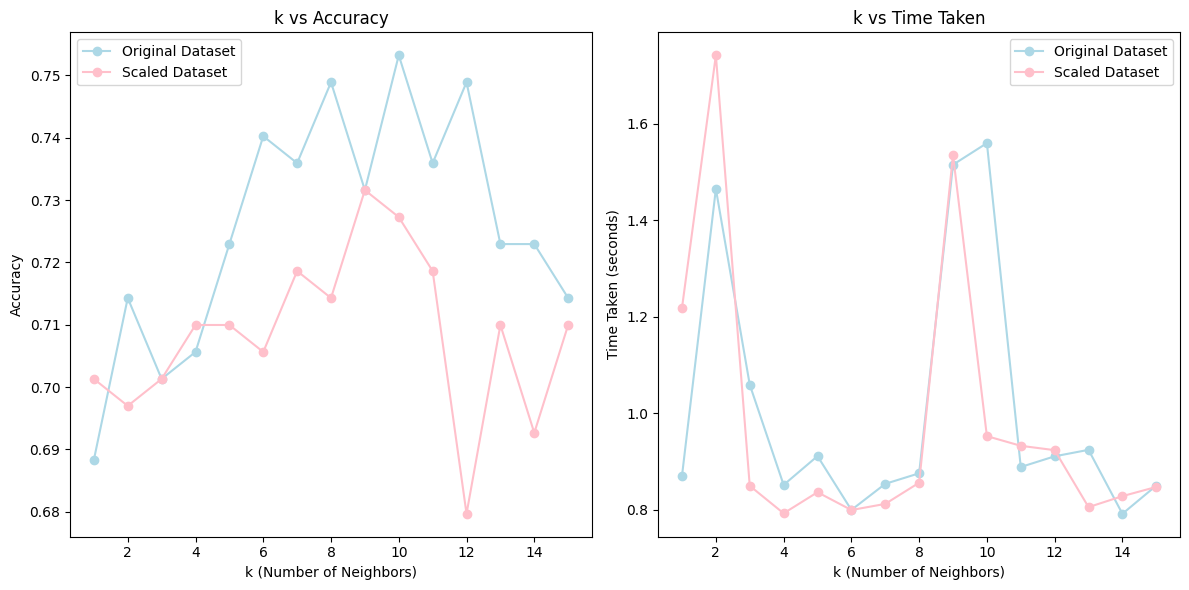

In [ ]:
# 2
import matplotlib.pyplot as plt

k_values = [result['k'] for result in results]
accuracy_original = [result['accuracy_original'] for result in results]
accuracy_scaled = [result['accuracy_scaled'] for result in results]
time_original = [result['time_original'] for result in results]
time_scaled = [result['time_scaled'] for result in results]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_original, label='Original Dataset', color='lightblue', marker='o')
plt.plot(k_values, accuracy_scaled, label='Scaled Dataset', color='pink', marker='o')
plt.title("k vs Accuracy")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label='Original Dataset', color='lightblue', marker='o')
plt.plot(k_values, time_scaled, label='Scaled Dataset', color='pink', marker='o')
plt.title("k vs Time Taken")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.legend()

plt.tight_layout()
plt.show()


**Effect of k on Accuracy and Computational Cost:**

Accuracy:

Small k (e.g., 1 or 2): Can lead to overfitting (model is too sensitive to noise and outliers), resulting in lower accuracy on new data.

Large k (e.g., 10 or more): The model becomes more stable and less sensitive to noise, but it can start to underfit (not capture important details), reducing accuracy.


Computational Cost:

Small k: Faster because fewer neighbors need to be considered.

Large k: Slower, as more neighbors need to be checked, which increases the computational time.


Optimal k:

The best k is one that gives high accuracy without taking too long to compute.
It's typically somewhere in the middle: not too small (which overfits) and not too large (which underfits).

# Problem-4
**Challenges of Using KNN for Large Datasets and High-Dimensional Data:**

Large Datasets: KNN is slow because it calculates the distance between the test point and every training point.

High-Dimensional Data: KNN struggles as data points become spread out, making distance calculations less meaningful.

Memory Usage: KNN requires a lot of memory since it stores the entire training dataset.

****Strategies to Improve KNN Efficiency:****

Approximate Nearest Neighbors: Use methods like KD-Trees or Locality-Sensitive Hashing to speed up the neighbor search.

Dimensionality Reduction: Use techniques like PCA to reduce features, improving performance and reducing computational load.